Compose(
    ToTensor()
    DownBlock(
  (model): Sequential(
    (0): Conv2d(4, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)
)
original dimensions =  (500, 726)
Down sample dimensions =  (16, 363, 250)


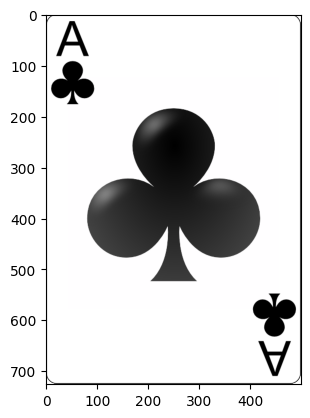

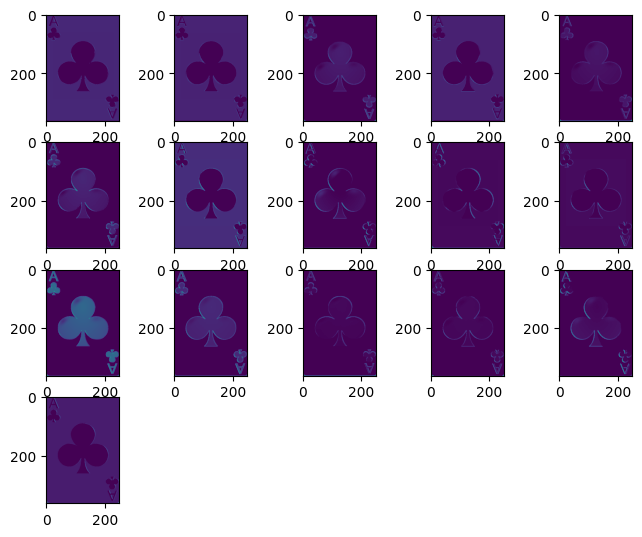

In [60]:
from torch import nn
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.transforms import ToTensor
import numpy as np 
from torchsummary import summary

class DownBlock(nn.Module):
    def __init__(self, in_ch, out_ch):
        kernel_size = 3
        stride = 1
        padding = 1

        super().__init__()
        layers = [
            nn.Conv2d(in_ch, out_ch, kernel_size, stride, padding),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(),
            nn.Conv2d(out_ch, out_ch, kernel_size, stride, padding),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(),
            nn.MaxPool2d(2)
        ]
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        x = x.unsqueeze(0)
        return self.model(x)
    
model = transforms.Compose([
        ToTensor(),
        DownBlock(4,16)
    ])

print (model)

img=Image.open("ace_of_clubs.png")
plt.imshow(img)
print("original dimensions = ", img.size)

downsample = model(img).squeeze(0).detach().numpy()
plt.figure(figsize=(8,8))

print("Down sample dimensions = ", downsample.shape,)
for c in range(len(downsample)):
    cols =4
    rows = len(downsample) // cols
    plt.subplot(rows+1,cols+1, c+1)
    plt.imshow(downsample[c])
